# Webscraping Top 500 book details from [goodreads](https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1) using Python
### With BeautifulSOup and Requests
##### Sep -Oct 2022
<br>

![](https://imgur.com/KJVdCcn.png)

## Introduction 
Goodreads.com is a comprehensive list of top-rated books, as voted on by the general Goodreads community.

We will use Python, BeautifulSoup and Requests to scrape first 5 pages and create list of top 500 books and some interesting information on them.
<br>

## Outline of the Project:

#### Part A: Exploration and scrapping information from 1 page
1. Download a single page from goodread.com and store it 
2. Scrape the stored page, and extract the required data from the page with BeautifulSoup

#### Part B: Put things together - a Scalable code for any number of pages
1. Create a dictionary to store the book information 
2. Write separate functions to scrape a particular information from the BeautifulSoup document, and add it to the dictionary
2. Repeat this for any number of pages by appending new items to the dictionary
3. Store this in a Panda detaframe
4. Save dataframe to a csv file

#### Setting up the project 

In [3]:
!pip install jovian --upgrade --quiet
!pip install requests --upgrade --quiet
!pip install beautifulsoup4 --upgrade --quiet

In [4]:
import jovian
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Part A: Exploration

### Step 1: Download a single page from goodread.com and stroe it in a directory

Let's begin with the first page - https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1

In [8]:
# download the web page using requests
response = requests.get('https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1')

#If response status is between 200-300, the download was successful
response

<Response [200]>

In [9]:
# capture the text content of the page from response
page_contents = response.text

In [10]:
# check the lenght of the page text
len(page_contents)

790778

In [21]:
# check a small sample of the page
page_contents[:500]

'<!DOCTYPE html>\n<html class="desktop withSiteHeaderTopFullImage\n">\n<head>\n  <title>Best Books Ever (93804 books)</title>\n\n<meta content=\'92,311 books based on 227927 votes: The Hunger Games by Suzanne Collins, Harry Potter and the Order of the Phoenix by J.K. Rowling, Pride and Prejudice b...\' name=\'description\'>\n<meta content=\'telephone=no\' name=\'format-detection\'>\n<link href=\'https://www.goodreads.com/list/show/1.Best_Books_Ever\' rel=\'canonical\'>\n\n\n\n    <script type="text/javascript"> var ue_t'

In [13]:
# Save the page as html to avoid scrapping multiple times while experimenting
with open('best_books_001.html', 'w', encoding="utf-8") as file:
    file.write(page_contents)

In [14]:
# read it html page to scrape information
with open('best_books_001.html', 'r') as f:
    html_source = f.read()

In [26]:
#doublecheck the file before exploring the tags. It contrins the webpage text as 'str' 
html_source[:500]

'<!DOCTYPE html>\n<html class="desktop withSiteHeaderTopFullImage\n">\n<head>\n  <title>Best Books Ever (93804 books)</title>\n\n<meta content=\'92,311 books based on 227927 votes: The Hunger Games by Suzanne Collins, Harry Potter and the Order of the Phoenix by J.K. Rowling, Pride and Prejudice b...\' name=\'description\'>\n<meta content=\'telephone=no\' name=\'format-detection\'>\n<link href=\'https://www.goodreads.com/list/show/1.Best_Books_Ever\' rel=\'canonical\'>\n\n\n\n    <script type="text/javascript"> var ue_t'

In [18]:
# The BeautifulSoup returns a document which we shall use to extract information
doc = BeautifulSoup(html_source, 'html.parser')

In [29]:
# validation: return datatype is bs4.BeautifulSoup
type(doc)

bs4.BeautifulSoup

In [30]:
#validation: inspect first 10 lines of the returned doc
doc.prettify().splitlines()[:10]

['<!DOCTYPE html>',
 '<html class="desktop withSiteHeaderTopFullImage">',
 ' <head>',
 '  <title>',
 '   Best Books Ever (93804 books)',
 '  </title>',
 '  <meta content="92,311 books based on 227927 votes: The Hunger Games by Suzanne Collins, Harry Potter and the Order of the Phoenix by J.K. Rowling, Pride and Prejudice b..." name="description"/>',
 '  <meta content="telephone=no" name="format-detection"/>',
 '  <link href="https://www.goodreads.com/list/show/1.Best_Books_Ever" rel="canonical"/>',
 '  <script type="text/javascript">']

### Step 2: Extract the required data from the page with BeautifulSoup
<br>
<div>
<img src="https://imgur.com/obXjCXN.png" width="700"/>
</div>

We want to get the following for each book title
1. **Book Title -** Title of the book
2. **Author Name -** Name of the Author of the book
3. **Avg. Rating -** Users have rated the book ranging from 1-5 stars. We take the average rating.
4. **Number of Ratings -** Number of users rated this title.
5. **Score -** Total score is based on multiple factors, including the number of people who have voted for it and how highly those voters ranked the book.
6. **Number of people voted -** Count of people who have voted for this book
7. **Book's URL -** Direct link to the book to find more detail about it
8. **Author's URL -** Direct link to the author's page to find more detail about his/ her credentials.


On visually inspecting the web-page, we can find the tags and classes that contains the necessary information for our use case.
<br><br>
<div>
<img src="https://imgur.com/a6V7KRQ.png" width="700"/>
</div>

#### Book Title

In [36]:
# get all the book titles in the page
book_titles = doc.find_all('a', class_='bookTitle')

# Validation: check if there are 100 book titles
len(book_titles)

100

In [33]:
# check few book titles 
book_titles[:3]

[<a class="bookTitle" href="/book/show/2767052-the-hunger-games" itemprop="url">
 <span aria-level="4" itemprop="name" role="heading">The Hunger Games (The Hunger Games, #1)</span>
 </a>,
 <a class="bookTitle" href="/book/show/2.Harry_Potter_and_the_Order_of_the_Phoenix" itemprop="url">
 <span aria-level="4" itemprop="name" role="heading">Harry Potter and the Order of the Phoenix (Harry Potter, #5)</span>
 </a>,
 <a class="bookTitle" href="/book/show/1885.Pride_and_Prejudice" itemprop="url">
 <span aria-level="4" itemprop="name" role="heading">Pride and Prejudice</span>
 </a>]

In [66]:
# for the first book name, get the exact title
book_title = book_titles[0].text.strip()
book_title

'The Hunger Games (The Hunger Games, #1)'

#### Author Name

In [37]:
# get all the author names in the page
author_names = doc.find_all('a', class_='authorName')

# Validation: check if there are 100 author names
len(author_names)

100

In [38]:
# for the first author name, get the exact first and last name
author_name = author_names[0].text.strip()
author_name

'Suzanne Collins'

#### Avg. Rating

In [48]:
# get all the ratings names in the page
ratings_and_raters = doc.find_all('span', class_='minirating')

# Validation: check if there are 100 ratings
print(len(ratings_and_raters))

100


In [63]:
# avg rating and number of ratings for the first book
ratings_and_raters_text = ratings_and_raters[0].text.strip()
ratings_and_raters_text

'4.32 avg rating — 7,587,110 ratings'

In [56]:
# Extract the two numeric parts, avg rating and number of ratings, from the string ratings_and_raters_text

# A helper function to convert text to number
# note that it hadles decimals and comma seperated strings
def stringToNumber(text):
    import re
    return re.findall(r"[0-9,.]+", text)

# Rating of the first book, from the first elment in ratings_and_raters_text list
rating = float(stringToNumber(ratings_and_raters_text)[0])
rating

4.32

#### Number of Ratings

In [57]:
# Number of ratings of the first book, from the second elment in ratings_and_raters_text list
rater_count = int((stringToNumber(ratings_and_raters_text)[1]).replace(',', ''))
rater_count

7587110

#### Score

In [59]:
# score and votes for the first book
scores_and_votes = doc.find_all('span', class_='smallText uitext')
scores_and_votes_text = scores_and_votes[0].text.strip()
scores_and_votes_text

'score: 3,337,490,\n              and\n33,984 people voted'

In [60]:
# Extract the two numeric parts, score and votes, from the string scores_and_votes_text
socre = int(stringToNumber(scores_and_votes_text)[0].replace(',', ''))
socre

3337490

#### Number of people voted

In [61]:
votes = int(stringToNumber(scores_and_votes_text)[1].replace(',', ''))
votes

33984

#### Book's URL

In [64]:
# as the the scrapped data, only a part of book title's url is present, we have to add it with the domain name
base_url = 'https://www.goodreads.com'

# from the first book title in 'book_titles' list, get the book url
book_title_url = base_url + book_titles[0]['href']
book_title_url

'https://www.goodreads.com/book/show/2767052-the-hunger-games'

#### Author's URL

In [78]:
# from the first authoer name in 'author names' list, get the url
author_name_url = author_names[0]['href']
author_name_url

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

## Part B: Putting things together

### Step 1: Create a dictionary to store the book information

We want to capture the following 8 attributes for each book in a page.

<div>
<img src="https://imgur.com/3pwCofL.png" width="300"/>
</div>


*Code snippet:*

```
    book_info = {
        'title': [],
        'author': [],
        'rating': [],
        'raters': [],
        'score': [],
        'votes': [],
        'title_url': [],
        'author_url': []
    }
 ```

### Step 2: Write separate functions to scrape a particular information from the BeautifulSoup document, and add it to the dictionary


For a single page, we scraped all the 100 titles as `book_titles = doc.find_all('a', class_='bookTitle')`. And to access one title a time, checked it's position in the list as `book_title = book_titles[0].text.strip()`. If we had to manually, we have to do this for `book_titles[0]` , `book_titles[0]`, .. 

Now to generalize it, we define a variable `i` that will represent all the titles a single page (that is 100) in the `book_titles` resultset. The `i` is a substitute for `book_titles[0]` in the above case in a function.

We shall add keep adding the new titles to the list until we reach the end of list at 100th book.

*Code snippet:*
```
def get_book_title(doc):
    book_titles= doc.find_all('a', class_='bookTitle')
    book_title = []
    for i in book_titles:
        book_title.append(i.text.strip())
    return book_title
```
    
Further we write other functions like `get_author_name()`, `get_ratings()`, `get_rater_count()` etc.   

### Step 3: Repeat this for any number of pages by extending the dictionary

To get the full list, we have to scrape 77 pages. However, as a proof of concept, we shall scrape first 5 pages. 

<div>
<img src="https://imgur.com/l6ul5cC.png" width="900"/>
</div>


Thus far we have managed to scrap all the 8 attributes of interest from a single page and stored them in a dictionary. 
Now we shall repeat this for the next page and concatentate the new dictionary with `extend()`.


*Code snippet:*

```  
    for i in range(1, n_pages+1): 
        doc = get_book_list_page(i)
        book_info['title'].extend(get_book_title(doc))
        book_info['author'].extend(get_author_name(doc))
        book_info['rating'].extend(get_ratings(doc))
        book_info['raters'].extend(get_rater_count(doc))
        book_info['score'].extend(get_score(doc))
        book_info['votes'].extend(get_voter_count(doc))
        book_info['title_url'].extend(get_title_url(doc))
        book_info['author_url'].extend(get_author_url(doc))
    return book_info

```

##### Special Note: In Python dictionary, the `append()` function is used to add elements to the keys in the dictionary. In the dictionary `extend()` means to concatentates the first dictionary with another dictionary.

### Executing steps 1, 2 and 3

In [84]:
# -------------------------------------------------------------------------------------------------------------
# Function to scrape a given page and return a bs doc object 
# doc object contains several properties and methods for extracting information from the HTML document
# -------------------------------------------------------------------------------------------------------------
# n = the page number to scrape 
def get_book_list_page(n):
    # Construct the URL
    page_url = 'https://www.goodreads.com/list/show/1.Best_Books_Ever?page='+str(n)

    # Get the HTML page content using requests
    response = requests.get(page_url)

    # Ensure that the reponse is valid
    if response.ok == False:
        print('Status code:', response.status_code)
        raise Exception('Failed to fetch web page ' + page_url)

    # Construct a beautiful soup document object to parse the document
    bs_doc = BeautifulSoup(response.text, 'html.parser')
    return bs_doc

# -------------------------------------------------------------------------------------------------------------
#  We will create a dictionary to keep record of 8 key attrbutes for each book title
#  These functions will append new elements to the dictionary for each of these key attributes
# -------------------------------------------------------------------------------------------------------------
def stringToNumber(text):
    import re
    return re.findall(r"[0-9,.]+", text)


def get_book_title(doc):
    book_titles= doc.find_all('a', class_='bookTitle')
    book_title = []
    for i in book_titles:
        book_title.append(i.text.strip())
    return book_title


def get_author_name(doc):
    author_names = doc.find_all('a', class_='authorName')
    author_name = []
    for i in author_names:
        author_name.append(i.text.strip())
    return author_name


def get_title_url(doc):
    book_titles = doc.find_all('a', class_='bookTitle')
    book_title_url = []
    for i in book_titles:
        book_title_url.append('https://www.goodreads.com'+i['href'])
    return book_title_url


def get_author_url(doc):
    author_names = doc.find_all('a', class_='authorName')
    author_name_url = []
    for i in author_names:
        author_name_url.append(i['href'])
    return author_name_url


def get_ratings(doc):
    ratings_and_raters = doc.find_all('span', class_='minirating')
    rating = []
    for i in ratings_and_raters:
        rating.append(float(stringToNumber(i.text.strip())[0]))
    return rating    


def get_rater_count(doc):
    ratings_and_raters = doc.find_all('span', class_='minirating')
    raters = []
    for i in ratings_and_raters:
        raters.append(int((stringToNumber(i.text.strip())[1]).replace(',', '')))
    return raters    


def get_score(doc):
    scores_and_votes = doc.find_all('span', class_='smallText uitext')
    score = []
    for i in scores_and_votes:
        score.append(int(stringToNumber(i.text.strip())[0].replace(',', '')))
    return score


def get_voter_count(doc):
    scores_and_votes = doc.find_all('span', class_='smallText uitext')
    votes = []
    for i in scores_and_votes:
        votes.append(int(stringToNumber(i.text.strip())[1].replace(',', '')))
    return votes


# -------------------------------------------------------------------------------------------------------------
# Scarape the first n pages
# -------------------------------------------------------------------------------------------------------------
def scrape_page(n_pages):

    # create a dictionary to hold all the information about a book
    book_info = {
        'title': [],
        'author': [],
        'rating': [],
        'raters': [],
        'score': [],
        'votes': [],
        'title_url': [],
        'author_url': []
    }

    # For every page, from 1 to the limit we want (here 5), run get_book_list_page() to extract info for 1 page at a time
    # new page results get appened to the old list
    for i in range(1, n_pages+1): 
        # get the doc object of a page        
        doc = get_book_list_page(i)
        
        # pass the doc object to functions to extract the 8 attributes from the page, 1 attrbute at a time         
        book_info['title'].extend(get_book_title(doc))
        book_info['author'].extend(get_author_name(doc))
        book_info['rating'].extend(get_ratings(doc))
        book_info['raters'].extend(get_rater_count(doc))
        book_info['score'].extend(get_score(doc))
        book_info['votes'].extend(get_voter_count(doc))
        book_info['title_url'].extend(get_title_url(doc))
        book_info['author_url'].extend(get_author_url(doc))
    return book_info

In [69]:
#Scrape first 5 pages to list top 500 book titles
book_list = scrape_page(5)

### Step 4: Store this in a Panda `detaframe`

In [76]:
# create a dataframe
book_list_df = pd.DataFrame(book_list)
book_list_df

,title,author,rating,raters,score,votes,title_url,author_url
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.32,7587357,3337590,33985,https://www.goodreads.com/book/show/2767052-th...,https://www.goodreads.com/author/show/153394.S...
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3012607,2882849,29461,https://www.goodreads.com/book/show/2.Harry_Po...,https://www.goodreads.com/author/show/1077326....
2,Pride and Prejudice,Jane Austen,4.28,3729497,2354188,24200,https://www.goodreads.com/book/show/1885.Pride...,https://www.goodreads.com/author/show/1265.Jan...
3,To Kill a Mockingbird,Harper Lee,4.27,5425627,2245706,22936,https://www.goodreads.com/book/show/2657.To_Ki...,https://www.goodreads.com/author/show/1825.Har...
4,The Book Thief,Markus Zusak,4.39,2245793,1600888,16486,https://www.goodreads.com/book/show/19063.The_...,https://www.goodreads.com/author/show/11466.Ma...
...,...,...,...,...,...,...,...,...
495,"Untamed (House of Night, #4)",P.C. Cast,3.94,227916,20937,272,https://www.goodreads.com/book/show/2866718-un...,https://www.goodreads.com/author/show/17015.P_...
496,"Voyager (Outlander, #3)",Diana Gabaldon,4.38,286993,20925,268,https://www.goodreads.com/book/show/10987.Voyager,https://www.goodreads.com/author/show/3617.Dia...
497,The Jungle,Upton Sinclair,3.76,137570,20917,291,https://www.goodreads.com/book/show/41681.The_...,https://www.goodreads.com/author/show/23510.Up...
498,Everything is Illuminated,Jonathan Safran Foer,3.89,174255,20674,255,https://www.goodreads.com/book/show/256566.Eve...,https://www.goodreads.com/author/show/2617.Jon...


### Step 5: Save `dataframe` to a csv file

In [72]:
# convert dataframe to a csv file
book_list_df.to_csv('book_list.csv',index=None)

## Extra: Some basic EDA

Check for any corelation between variables.

In [79]:
# Install for plotting
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet

In [81]:
# print coorelation table
print(book_list_df.corr())

          rating    raters     score     votes
rating  1.000000  0.106927  0.121987  0.119735
raters  0.106927  1.000000  0.660867  0.662067
score   0.121987  0.660867  1.000000  0.999667
votes   0.119735  0.662067  0.999667  1.000000


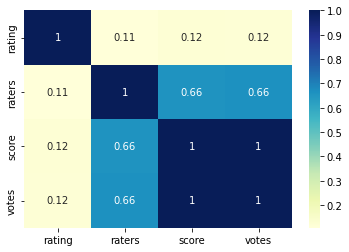

In [82]:
import matplotlib.pyplot as plt
import seaborn as sb

# plotting correlation heatmap
dataplot = sb.heatmap(book_list_df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

We can see some corelation between Score and Raters, and Score and Voters.

However it it too early to conclude anything without deeper investigating. Which we will do in future.

## Summary 

Listed top 500 book titles and related details from [goodreads](https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1) using Python BueatifulSoup and Requests library.

For each title, we chose **8 interesting attributes** to scrape - book title, author, rating, no of ratings, votes, number of voters, book title url and auther url. 

In a page, there are 100 book titles. We have created a `dictionary` data structure for each book with these 8 attributes as `lists`. 
We have looped through all the 100 books in the page, one at a time, to extract and append all the 8 attributes to their respective `list`. This way, we have compiled the information of 8 attributes for 100 titles in a single page.

After that, we have repeated this process over next 4 pages by concatenating 100 new book `dictionary` entry from every page.

End the end, we convert the `dictionary` of 500 books to a `dataframe` for analysis, and convert it to CSV file format to upload to the project directory. 

## Future Work
1. Refactor the code and optimize the fucntions further. 
2. Add new attributes like Book Description, About the Author. 
3. Go to each book page, and get more details like ISBN, pages, language, Awards etc.
4. Explore this data and find some interesting insights.

## References

1. [Stackoverflow](https://stackoverflow.com)
2. [Geeksforgeeks](https://www.geeksforgeeks.org)
3. [Medium](https://medium.com)
4. [Jovian - Featured Projects](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/assignment/project-web-scraping-with-python/featured)

In [74]:
jovian.commit(files = ['book_list.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "arindam-au/webscraping-goodreads" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/arindam-au/webscraping-goodreads


'https://jovian.ai/arindam-au/webscraping-goodreads'

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="webscraping-goodreads")

<IPython.core.display.Javascript object>